In [1]:
#Exploration des données 

In [2]:
"""
Import
"""
import os 
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("DataOrigine/cel_export.csv")
df_copy = df.copy()

In [4]:
# Taille du Dataframe  2776 Lignes et 60 Colonnes
df_copy.shape

(2776, 60)

In [5]:
#Nombre de valeurs null par colonne 
df_copy.isnull().sum()

Identifiant unique                                                 0
Identifiant                                                        0
Espèce                                                             4
Numéro nomenclatural                                             571
Nom retenu                                                       208
Numéro nomenclatural nom retenu                                  258
Famille                                                         1639
Référentiel taxonomique                                          312
Certitude                                                          0
Type d'observation                                                 0
Source de la saisie                                                0
Spontanéité                                                        0
Latitude                                                           0
Longitude                                                          0
Référentiel Géographique          

In [6]:
#colonnes avec que les valeurs manquanets 
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df_copy)

Espèce => 4
Numéro nomenclatural => 571
Nom retenu => 208
Numéro nomenclatural nom retenu => 258
Famille => 1639
Référentiel taxonomique => 312
Identifiant Commune => 398
Floutage (niveau de localisation diffusé) => 326
Lieu-dit => 2776
Milieu => 2776
Notes => 2552
Lien vers l'observation sur IdentiPlante => 2538
Image(s) => 2538
Cohérence entre la localité et les coordonnées GPS => 2776
Précision de la localisation => 2776
Station => 2776
Score IdentiPlante => 1250
Abondance => 2776
Phénologie => 2776
Observateur => 2758
Structure de l'observateur => 2776
Déterminateur => 2776
Source bibliographique => 2776
ext:altitude-releve => 2727
ext:circonference => 2363
ext:face-ombre => 2363
ext:latitude-releve => 2374
ext:longitude-releve => 2374
ext:num_arbre => 2363
ext:rue-arbres => 2381
ext:id_obs_arbre => 413
ext:loc-sur-tronc => 426
ext:com-arbres => 2761
ext:latitude-arbres => 2765
ext:longitude-arbres => 2765
ext:altitude-arbres => 2765


In [7]:
#Valeurs null 
def donnee_manquantes(df):
    '''prints out columns with missing values with its %'''
    for col in df_copy.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
donnee_manquantes(df_copy)

Espèce => 0.14%
Numéro nomenclatural => 20.57%
Nom retenu => 7.49%
Numéro nomenclatural nom retenu => 9.29%
Famille => 59.04%
Référentiel taxonomique => 11.24%
Identifiant Commune => 14.34%
Floutage (niveau de localisation diffusé) => 11.74%
Lieu-dit => 100.0%
Milieu => 100.0%
Notes => 91.93%
Lien vers l'observation sur IdentiPlante => 91.43%
Image(s) => 91.43%
Cohérence entre la localité et les coordonnées GPS => 100.0%
Précision de la localisation => 100.0%
Station => 100.0%
Score IdentiPlante => 45.03%
Abondance => 100.0%
Phénologie => 100.0%
Observateur => 99.35%
Structure de l'observateur => 100.0%
Déterminateur => 100.0%
Source bibliographique => 100.0%
ext:altitude-releve => 98.23%
ext:circonference => 85.12%
ext:face-ombre => 85.12%
ext:latitude-releve => 85.52%
ext:longitude-releve => 85.52%
ext:num_arbre => 85.12%
ext:rue-arbres => 85.77%
ext:id_obs_arbre => 14.88%
ext:loc-sur-tronc => 15.35%
ext:com-arbres => 99.46%
ext:latitude-arbres => 99.6%
ext:longitude-arbres => 99.6%


<AxesSubplot:>

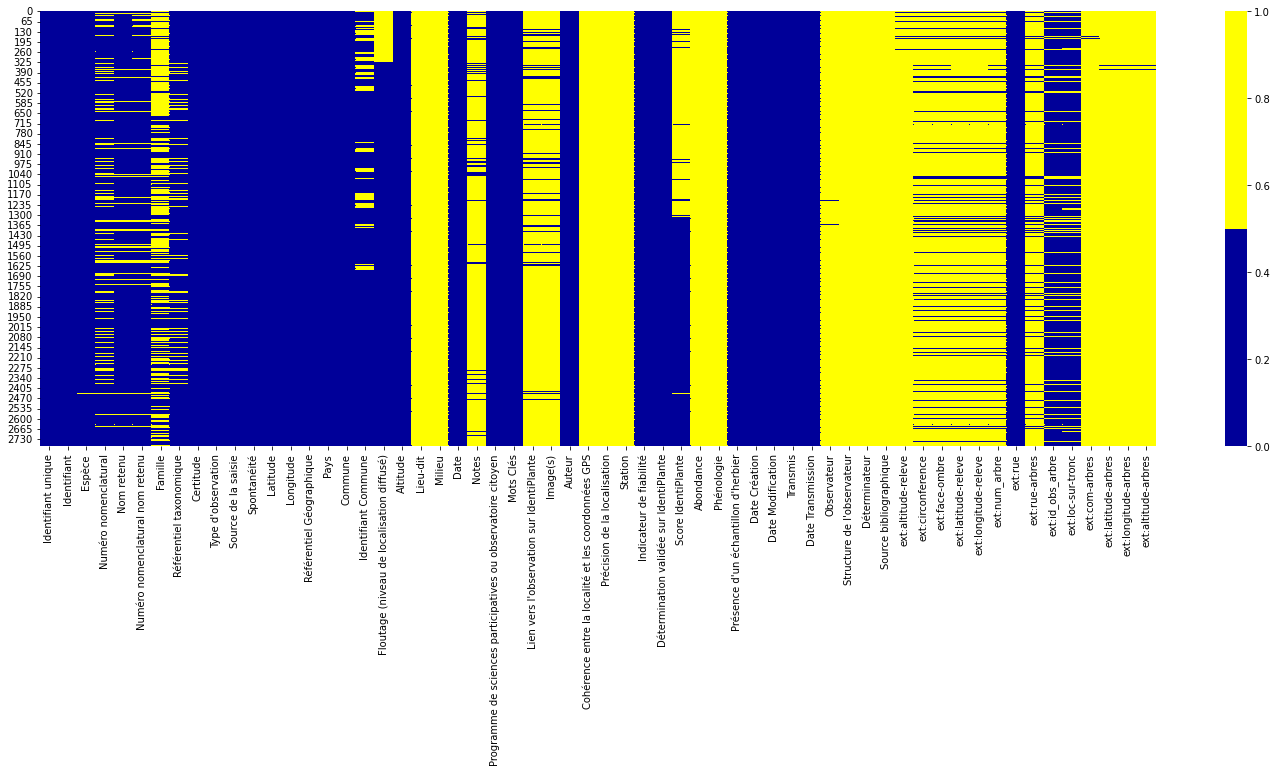

In [8]:
#carte de chaleurs des valeurs null 
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [9]:
# Suppression des colonnes non nécessaires

colonnes_a_sup = ["Lieu-dit", "Milieu", "Notes", "Lien vers l'observation sur IdentiPlante", "Image(s)", "Cohérence entre la localité et les coordonnées GPS", "Précision de la localisation",
                 "Station", "Abondance", "Phénologie", "Observateur", "Structure de l'observateur","Déterminateur","Source bibliographique", "ext:altitude-releve",
                 "ext:circonference", "ext:face-ombre", "ext:com-arbres","ext:latitude-arbres","ext:longitude-arbres","ext:altitude-arbres", "Nom retenu", "Numéro nomenclatural nom retenu",
                 "Certitude", "Source de la saisie", "Mots Clés","Indicateur de fiabilité",  "Score IdentiPlante", "Abondance", "Phénologie",
                 "Présence d'un échantillon d'herbier" ,"Date Transmission"]

df_copy.drop(colonnes_a_sup, axis = 1, inplace = True)
    

In [10]:
df_copy.shape

(2776, 30)

In [11]:
missing_cols(df_copy)

Espèce => 4
Numéro nomenclatural => 571
Famille => 1639
Référentiel taxonomique => 312
Identifiant Commune => 398
Floutage (niveau de localisation diffusé) => 326
ext:latitude-releve => 2374
ext:longitude-releve => 2374
ext:num_arbre => 2363
ext:rue-arbres => 2381
ext:id_obs_arbre => 413
ext:loc-sur-tronc => 426


In [12]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Création,Date Modification,Transmis,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55616,2.97596,...,2019-07-01 11:11:06,2020-03-23 14:30:29,oui,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55609,2.97587,...,2019-07-01 11:11:06,2020-03-23 14:31:10,oui,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55600,2.97580,...,2019-07-01 11:11:07,2020-03-23 14:27:20,oui,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,NaN,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:00,2019-07-01 11:14:01,oui,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n2;n3;n4;
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,NaN,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,2019-07-01 11:14:01,oui,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n1;n2;n3;n4;n5;


In [13]:
# Après avoir supprimé les colonnes nécessaires, nous avons maintenant que 39 colonnes
df_copy.shape

(2776, 30)

<AxesSubplot:>

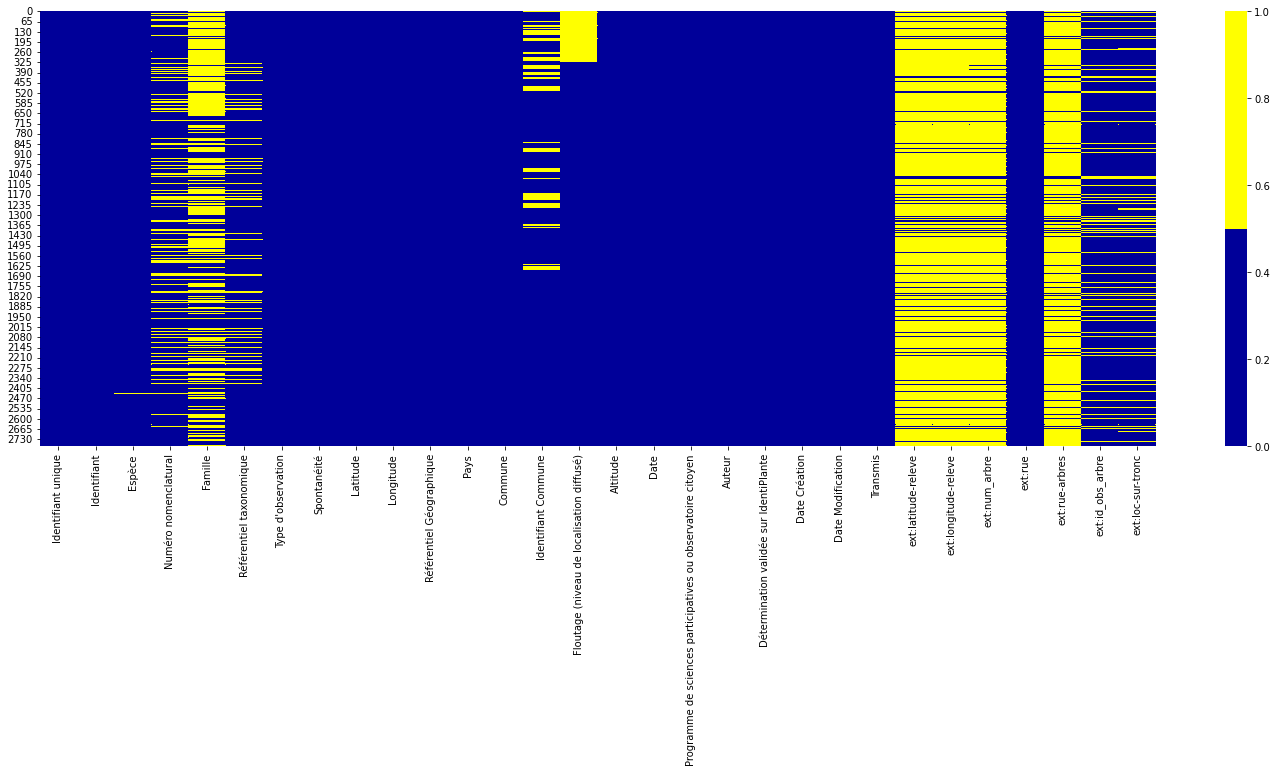

In [14]:
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [15]:
#convertir la colonne Identifiant commune d'abord en float avec la fonction to_numeric. 
df_copy["Identifiant Commune" ] = pd.to_numeric(df_copy['Identifiant Commune'])

In [16]:
df_copy.dtypes

Identifiant unique                                               object
Identifiant                                                       int64
Espèce                                                           object
Numéro nomenclatural                                            float64
Famille                                                          object
Référentiel taxonomique                                          object
Type d'observation                                               object
Spontanéité                                                       int64
Latitude                                                        float64
Longitude                                                       float64
Référentiel Géographique                                         object
Pays                                                             object
Commune                                                          object
Identifiant Commune                                             

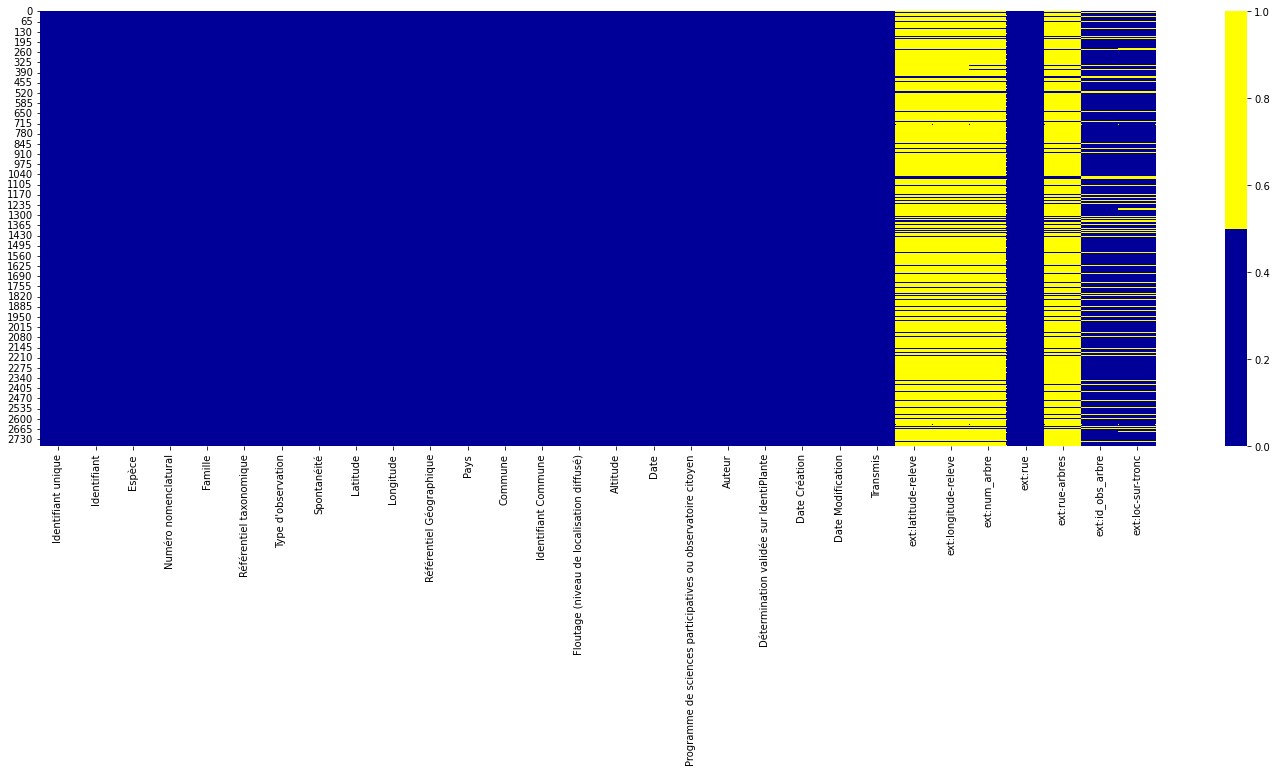

In [17]:
# Traitement des valeurs manquantes dans le dataFrame. 
df_copy.Famille = df_copy["Famille"].fillna("Null")
df_copy["Référentiel taxonomique"] = df_copy["Référentiel taxonomique"].fillna("Autre/inconnu")
df_copy["Identifiant Commune"] = df_copy["Identifiant Commune"].fillna(0.0).astype(int)
df_copy["Numéro nomenclatural"] = df_copy["Numéro nomenclatural"].fillna(0.0).astype(int)
df_copy["Espèce"] = df_copy["Espèce"].fillna("Null")
df_copy["Floutage (niveau de localisation diffusé)"] = df_copy["Floutage (niveau de localisation diffusé)"].fillna("Null")
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_copy[cols].isnull(), cmap=sns.color_palette(colours))
df_copy.to_csv("df_copyClean.csv")

In [18]:
df_copy.dtypes

Identifiant unique                                               object
Identifiant                                                       int64
Espèce                                                           object
Numéro nomenclatural                                              int32
Famille                                                          object
Référentiel taxonomique                                          object
Type d'observation                                               object
Spontanéité                                                       int64
Latitude                                                        float64
Longitude                                                       float64
Référentiel Géographique                                         object
Pays                                                             object
Commune                                                          object
Identifiant Commune                                             

In [19]:
df["ext:latitude-releve"].isna()

0       False
1       False
2       False
3        True
4        True
        ...  
2771     True
2772     True
2773     True
2774     True
2775     True
Name: ext:latitude-releve, Length: 2776, dtype: bool

In [20]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Création,Date Modification,Transmis,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954,Null,bdtfx,observation de terrain,0,42.55616,2.97596,...,2019-07-01 11:11:06,2020-03-23 14:30:29,oui,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954,Null,bdtfx,observation de terrain,0,42.55609,2.97587,...,2019-07-01 11:11:06,2020-03-23 14:31:10,oui,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954,Null,bdtfx,observation de terrain,0,42.55600,2.97580,...,2019-07-01 11:11:07,2020-03-23 14:27:20,oui,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:00,2019-07-01 11:14:01,oui,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n2;n3;n4;
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,2019-07-01 11:14:01,oui,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n1;n2;n3;n4;n5;


In [22]:
#Sélectionner les arbres et les exporter vers une tables uniques 
filtr_arbre_saisi =  df_copy[df_copy['ext:latitude-releve'].notnull()]
arbre_saisi = filtr_arbre_saisi[["Identifiant", "Espèce","Latitude","Longitude","Commune","Pays","Date Création"]] 

arbre_saisi.to_csv("table_arbre_saisi.csv")

#Séléctionner les lichens et les exporter vers une table unique
filtr_lichens_saisi = df_copy[df_copy["ext:latitude-releve"].isnull()]
lichens_saisi = filtr_lichens_saisi [["Identifiant", "Espèce","Date Création", "Latitude", "Longitude", "ext:loc-sur-tronc" ]]

lichens_saisi.to_csv("table_lichens_saisi.csv")   
